In [1]:
import warnings
warnings.filterwarnings("ignore")
import re
import os
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
generalData_df=pd.read_csv("C:/Users/hp/Downloads/updatedlist - Sheet1.csv");

In [3]:
print(generalData_df.columns)

Index(['Company Name', 'Company Real or Fake(1 or 0)',
       'LinkedIn Followers greater 1000', 'Profile Picture',
       'Responsive Website', 'Staff Count greater 1000',
       'Staff Premium Accounts', 'Summary Section', 'Verified Address',
       'Published Articles', 'Requests Sensitive Info', 'Legitimate Email',
       'LinkedIn Recommendations'],
      dtype='object')


In [4]:
#generalData_df.drop(generalData_df[generalData_df['Company Name'].str.contains('Influx Soft Solutions')])
    
#generalData_df.drop(generalData_df[generalData_df['Influx Soft Solutions']], inplace = True )
generalData_df

,Company Name,Company Real or Fake(1 or 0),LinkedIn Followers greater 1000,Profile Picture,Responsive Website,Staff Count greater 1000,Staff Premium Accounts,Summary Section,Verified Address,Published Articles,Requests Sensitive Info,Legitimate Email,LinkedIn Recommendations
0,ALPHALINX INDIA PVT LTD,0,1,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Buttress Tech0logies Pvt Ltd,0,1,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Future Focus Tech0logies,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Gravity Tech Inc,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Digitech Solution Limited,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,WTS Energy,1,1,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
795,Bajaj Allianz General Insurance,1,1,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
796,"Cameron, a Schlumberger company",1,1,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
797,JMC Projects (India) Ltd,1,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:

# generalData_df['Company Real or Fake(1 or 0)'] = generalData_df['Company Real or Fake(1 or 0)'].map({'1': 1, '0': 0})
# generalData_df['LinkedIn Followers greater 1000'] = generalData_df['LinkedIn Followers greater 1000'].map({'1': 1, '0': 0})
# generalData_df['Profile Picture'] = generalData_df['Profile Picture'].map({'1': 1, '0': 0})
# generalData_df['Responsive Website'] = generalData_df['Responsive Website'].map({'1': 1, '0': 0})
# generalData_df['Staff Count greater 1000'] = generalData_df['Staff Count greater 1000'].map({'1': 1, '0': 0})
# generalData_df['Staff Premium Accounts'] = generalData_df['Staff Premium Accounts'].map({'1': 1, '0': 0})
# generalData_df['Summary Section'] = generalData_df['Summary Section'].map({'1.0': 1, '0.0': 0})
# generalData_df['Verified Address'] = generalData_df['Verified Address'].map({'1.0': 1, '0.0': 0})
# generalData_df['Published Articles'] = generalData_df['Published Articles'].map({'1.0': 1, '0.0': 0})
# generalData_df['Requests Sensitive Info'] = generalData_df['Requests Sensitive Info'].map({'1.0': 1, '0.0': 0})

# generalData_df['Legitimate Email'] = generalData_df['Legitimate Email'].map({'1.0': 1, '0.0': 0})

# generalData_df['LinkedIn Recommendations'] = generalData_df['LinkedIn Recommendations'].map({'1.0': 1, '0.0': 0})



In [6]:
generalData_df

,Company Name,Company Real or Fake(1 or 0),LinkedIn Followers greater 1000,Profile Picture,Responsive Website,Staff Count greater 1000,Staff Premium Accounts,Summary Section,Verified Address,Published Articles,Requests Sensitive Info,Legitimate Email,LinkedIn Recommendations
0,ALPHALINX INDIA PVT LTD,0,1,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Buttress Tech0logies Pvt Ltd,0,1,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Future Focus Tech0logies,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Gravity Tech Inc,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Digitech Solution Limited,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,WTS Energy,1,1,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
795,Bajaj Allianz General Insurance,1,1,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
796,"Cameron, a Schlumberger company",1,1,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
797,JMC Projects (India) Ltd,1,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(generalData_df.isnull().sum().sum())

42


In [8]:
generalData_df.dropna(inplace=True)

In [9]:
print(generalData_df.isnull().any().sum())

0


In [11]:
final_df_dupliactedRows=generalData_df[generalData_df.duplicated( keep=False)].shape[0]
if(final_df_dupliactedRows==0):
  print("there is No duplicate elements in Final_df")
else:
  print("there is  duplicate elements in Final_df")

there is  duplicate elements in Final_df


In [12]:
generalData_df.drop_duplicates(subset=['Company Name'], keep='first', inplace=True)

In [13]:
generalData_df_dupliactedRows=generalData_df[generalData_df.duplicated( keep=False)].shape[0]
if(generalData_df_dupliactedRows==0):
  print("there is No duplicate elements in Final_df")
else:
  print("there is  duplicate elements in Final_df")

there is No duplicate elements in Final_df


In [14]:
generalData_df

,Company Name,Company Real or Fake(1 or 0),LinkedIn Followers greater 1000,Profile Picture,Responsive Website,Staff Count greater 1000,Staff Premium Accounts,Summary Section,Verified Address,Published Articles,Requests Sensitive Info,Legitimate Email,LinkedIn Recommendations
0,ALPHALINX INDIA PVT LTD,0,1,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Buttress Tech0logies Pvt Ltd,0,1,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Future Focus Tech0logies,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Gravity Tech Inc,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Digitech Solution Limited,0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,Teradata,1,1,0,0,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0
794,WTS Energy,1,1,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
795,Bajaj Allianz General Insurance,1,1,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
796,"Cameron, a Schlumberger company",1,1,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0


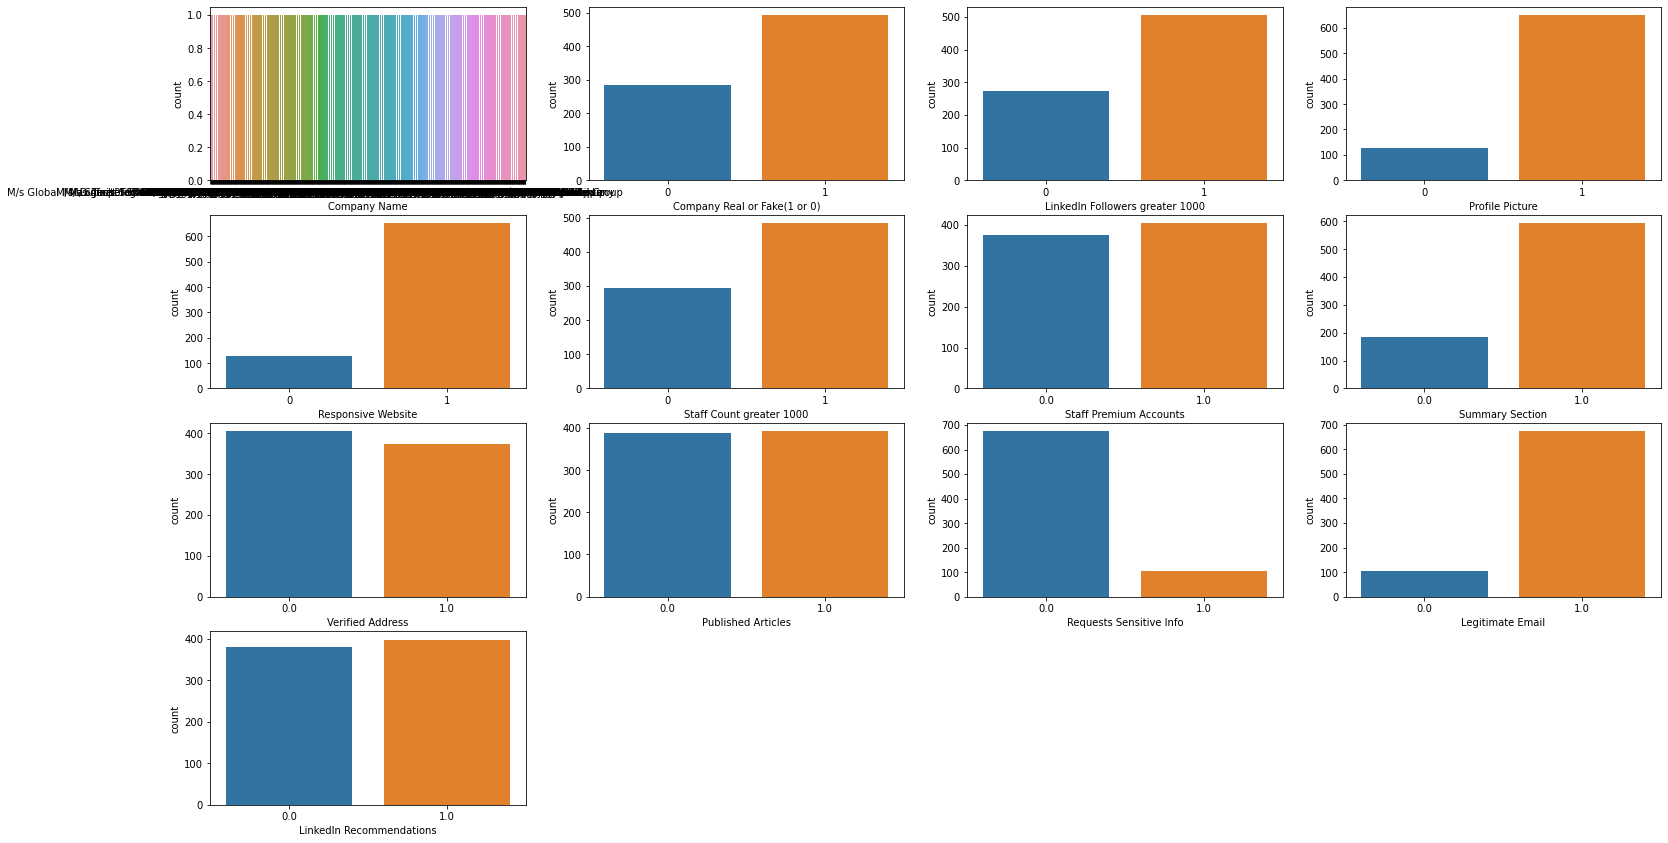

In [15]:
#For all columns doing countplots
fig = plt.figure(figsize=(26,30))
for idx,i in enumerate(generalData_df.columns.tolist()):
    ax=plt.subplot(8,4,idx+1)
    sns.countplot(x=i,data=generalData_df,ax=ax)
plt.show()

<AxesSubplot:>

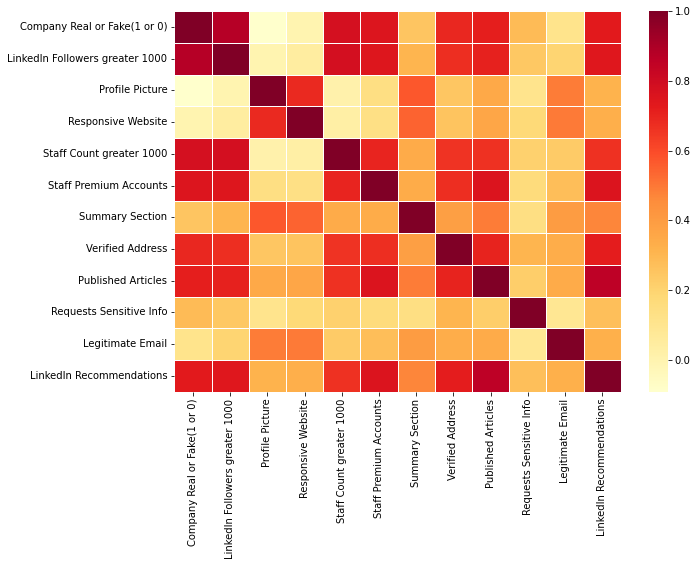

In [16]:
fig, ax = plt.subplots(figsize=(10,7))         # Sample figsize in inches

sns.heatmap(generalData_df.corr(),cmap='YlOrRd',linewidths=.5,ax=ax)

In [17]:
generalData_df.corr()

,Company Real or Fake(1 or 0),LinkedIn Followers greater 1000,Profile Picture,Responsive Website,Staff Count greater 1000,Staff Premium Accounts,Summary Section,Verified Address,Published Articles,Requests Sensitive Info,Legitimate Email,LinkedIn Recommendations
Company Real or Fake(1 or 0),1.000000,0.877671,-0.092269,-0.003343,0.780602,0.751040,0.249746,0.692565,0.716473,0.284186,0.110529,0.728332
LinkedIn Followers greater 1000,0.877671,1.000000,-0.006226,0.047293,0.785532,0.746242,0.308080,0.673541,0.706966,0.242643,0.195024,0.739967
Profile Picture,-0.092269,-0.006226,1.000000,0.685844,0.010910,0.141317,0.572352,0.245829,0.349275,0.104007,0.490867,0.314602
Responsive Website,-0.003343,0.047293,0.685844,1.000000,0.027986,0.131201,0.543502,0.257178,0.360781,0.174198,0.493797,0.325948
Staff Count greater 1000,0.780602,0.785532,0.010910,0.027986,1.000000,0.699104,0.344913,0.660183,0.663995,0.207399,0.230471,0.665580
Staff Premium Accounts,0.751040,0.746242,0.141317,0.131201,0.699104,1.000000,0.340255,0.673856,0.753829,0.162093,0.277049,0.753419
Summary Section,0.249746,0.308080,0.572352,0.543502,0.344913,0.340255,1.000000,0.387521,0.491393,0.141697,0.401255,0.470012
Verified Address,0.692565,0.673541,0.245829,0.257178,0.660183,0.673856,0.387521,1.000000,0.703009,0.305394,0.336412,0.719196
Published Articles,0.716473,0.706966,0.349275,0.360781,0.663995,0.753829,0.491393,0.703009,1.000000,0.219254,0.347005,0.856307
Requests Sensitive Info,0.284186,0.242643,0.104007,0.174198,0.207399,0.162093,0.141697,0.305394,0.219254,1.000000,0.090861,0.273379


In [18]:
 generalData_df['Company Real or Fake(1 or 0)']

0      0
1      0
2      0
3      0
4      0
      ..
793    1
794    1
795    1
796    1
797    1
Name: Company Real or Fake(1 or 0), Length: 779, dtype: int64

In [19]:
corr_matrix = generalData_df.corr()
print(corr_matrix['Company Real or Fake(1 or 0)'].sort_values(ascending=False))

Company Real or Fake(1 or 0)       1.000000
LinkedIn Followers greater 1000    0.877671
Staff Count greater 1000           0.780602
Staff Premium Accounts             0.751040
LinkedIn Recommendations           0.728332
Published Articles                 0.716473
Verified Address                   0.692565
Requests Sensitive Info            0.284186
Summary Section                    0.249746
Legitimate Email                   0.110529
Responsive Website                -0.003343
Profile Picture                   -0.092269
Name: Company Real or Fake(1 or 0), dtype: float64


In [20]:
rating = []

In [21]:
# for row in df['risk_score']:
#         if row < 1.0 :    rating.append('AA')
#         elif row < 2.0:   rating.append('A')
#         elif row < 3.0:  rating.append('BB')
#         elif row < 4.0:  rating.append('B')
#         elif row < 5.0:  rating.append('C')
        
#         else:           rating.append('Not_Rated')
            
#     df['rating'] = rating
#     print(df)  




# for i in generalData_df:
#     if generalData_df['Staff Count > 1000','Staff Premium Accounts','LinkedIn Recommendations','Published Articles','Verified Address'] =='0.0':
#         i= rating.append('5')
#     elif generalData_df['Staff Count > 1000 ','Staff Premium Accounts','LinkedIn Recommendations']=='0.0':
#         i= rating.append('4')
#     elif generalData_df['Published Articles','Verified Address']=='0.0':
#         i= rating.append('3')
#     else:
#         i= rating.append('2')




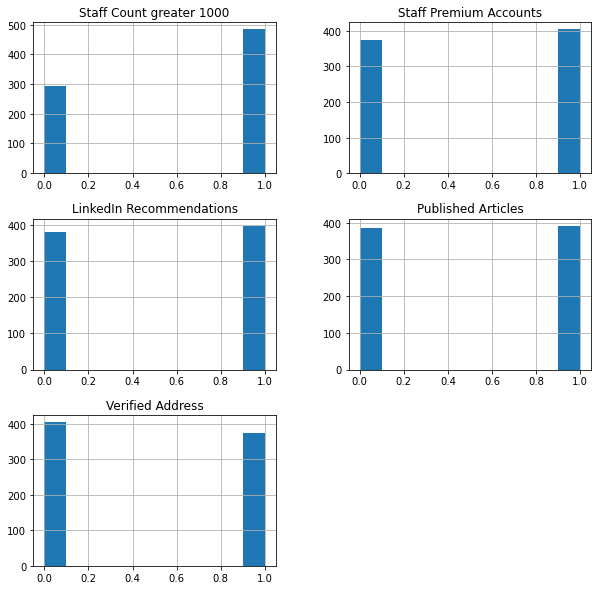

In [22]:
columns=generalData_df.columns.tolist()
num_col_eda=[  
'Staff Count greater 1000',              
'Staff Premium Accounts' ,         
'LinkedIn Recommendations',        
'Published Articles'  ,            
'Verified Address' ]
generalData_df[num_col_eda].hist(figsize=(10,10))
plt.show()

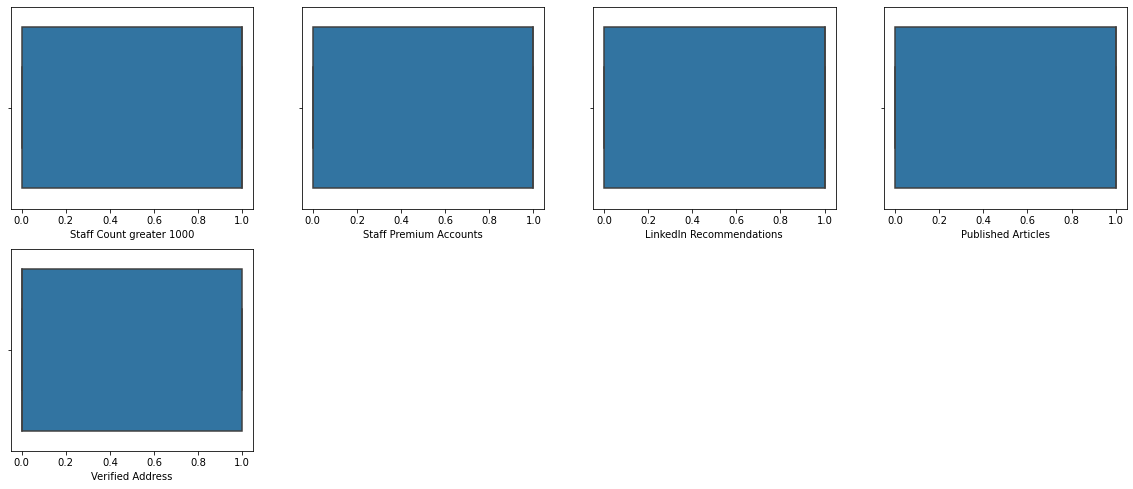

In [23]:
#Box Plot for finding "Outiler" in our data
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(num_col_eda):
    ax=plt.subplot(6,4,idx+1)
    sns.boxplot(x=i,data=generalData_df,ax=ax)

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#final_df["Company Name"] = le.fit_transform(final_df["Company Name"])
#final_df["Company Name"]

generalData_df["Company Name"] = le.fit_transform(generalData_df["Company Name"])
generalData_df["Company Name"]

0        9
1      111
2      251
3      285
4      186
      ... 
793    671
794    748
795     89
796    124
797    360
Name: Company Name, Length: 779, dtype: int32

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split


attrition_lable=generalData_df['Company Real or Fake(1 or 0)']
final_df=generalData_df.drop('Company Real or Fake(1 or 0)',1)

#attrition_lable=attrition_lable.map(lambda x : 1 if(x==1.0) else 0)


X_train, X_test, y_train, y_test = train_test_split(final_df,attrition_lable,test_size=0.50,stratify=attrition_lable, random_state=1)

In [27]:
#X_train=pd.get_dummies(X_train)
#X_test=pd.get_dummies(X_test)
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# final_df["Company Name"] = le.fit_transform(final_df["Company Name"])
# final_df["Company Name"]

In [28]:
#X_train=pd.get_dummies(X_train)
#X_test=pd.get_dummies(X_test)
#X_train
#X_test


In [29]:
final_df["Company Name"]



0        9
1      111
2      251
3      285
4      186
      ... 
793    671
794    748
795     89
796    124
797    360
Name: Company Name, Length: 779, dtype: int32

In [30]:
from sklearn.tree import DecisionTreeClassifier
ml = DecisionTreeClassifier()
ml.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
y_pred = ml.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.9564102564102565

In [33]:
# new_input = [[0,1,0,1,0,0,1,1,0,0,1,0,1]]
# # get prediction for new input
# new_output = ml.predict(new_input)
# # summarize input and output
# print(new_input, new_output)

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()

In [35]:
print('confusion matrix')
print(confusion_matrix(y_test, y_pred))

confusion matrix
[[134   9]
 [  8 239]]


In [36]:
from sklearn.metrics import classification_report

In [56]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       143
           1       0.96      0.98      0.97       247

    accuracy                           0.96       390
   macro avg       0.96      0.95      0.95       390
weighted avg       0.96      0.96      0.96       390



In [38]:
final_df

,Company Name,LinkedIn Followers greater 1000,Profile Picture,Responsive Website,Staff Count greater 1000,Staff Premium Accounts,Summary Section,Verified Address,Published Articles,Requests Sensitive Info,Legitimate Email,LinkedIn Recommendations
0,9,1,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,111,1,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,251,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,285,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,186,1,1,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
793,671,1,0,0,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0
794,748,1,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
795,89,1,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
796,124,1,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
# make a single prediction with the model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# create the inputs and outputs
X, y = make_blobs(n_samples=600, centers=2, n_features=12, random_state=2)
# define model
model = LogisticRegression(solver='lbfgs')
# fit model
model.fit(X, y)
# make predictions on the entire training dataset
yhat = model.predict(X)
# connect predictions with outputs
for i in range(10):
 print(X[i], yhat[i])

[-0.27605502 -9.42689219  1.65834394 -3.25615682  0.52007101 -6.20076069
 -7.30380255  2.64953821 -2.9143896  -3.99885292  3.27923019 -0.52298094] 0
[ -9.68479063  -0.30935508  -5.87123954   5.91146826   5.70729816
  -0.42554331   6.42306282 -10.23140433   1.83483897  -8.19546235
  -0.41837257  -7.95679888] 1
[-8.24770856e+00 -2.25513452e-01 -7.37574023e+00  4.10244032e+00
  7.00652964e+00  7.24242021e-03  4.85490890e+00 -8.00978936e+00
 -1.26226006e+00 -7.23752897e+00 -2.33343405e-01 -7.48595842e+00] 1
[-7.28661178  1.20988134 -5.27749161  4.01505435  7.64208625  0.05931639
  8.4036984  -9.47607378  0.65812257 -8.99741005 -1.3651049  -9.00217793] 1
[-8.64809616 -1.67295785 -6.4234571   5.49752787  6.47312627 -1.4707401
  5.94071239 -7.43585944  0.17517878 -8.06270029 -0.83733212 -9.52971856] 1
[ -2.1244102  -10.04129548   0.39272915   0.32132109  -1.19769074
  -4.59711705  -7.15449975   2.30787308  -4.02024628  -5.43177775
   2.71391067   0.38551094] 0
[ -1.00641892 -11.08304529   0.7

In [40]:
# Make predictions on the input data
predictions =ml.predict(final_df)

# Print the predicted target variable values
print("Predicted Target Values:", predictions)

Predicted Target Values: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1


In [46]:
final_df.columns

Index(['Company Name', 'LinkedIn Followers greater 1000', 'Profile Picture',
       'Responsive Website', 'Staff Count greater 1000',
       'Staff Premium Accounts', 'Summary Section', 'Verified Address',
       'Published Articles', 'Requests Sensitive Info', 'Legitimate Email',
       'LinkedIn Recommendations'],
      dtype='object')

In [41]:
# Make predictions on the input data
predictions =ml.predict(final_df)

# Print the predicted target variable values
print("Predicted Target Values:", predictions)

Predicted Target Values: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1


In [44]:
features = np.array([[1,0,1,1,0,1,1,0,1,0,0,1]])
# using inputs to predict the output
prediction = ml.predict(features)
print("Prediction: {}".format(prediction))

Prediction: [0]
